In [1]:
# 引入mnist
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784')

In [2]:
mnist.target = mnist.target.astype(np.int8)

In [3]:
np.unique(mnist['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [4]:
x,y = mnist['data'],mnist['target']

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [6]:
y[3900]

1

In [7]:
digit = x[3900]

In [8]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([5, 0, 4, ..., 4, 5, 6], dtype=int8),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel

In [9]:
digit_image = digit.reshape(28,28)

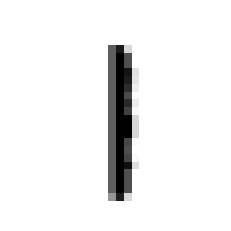

In [10]:
# 將彩色字白黑化
plt.imshow(digit_image,cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [11]:
x_train,x_test,y_train,y_test = x[:6000],x[6000:],y[:6000],y[6000:];#[開始（含）：到這之前（不含）]

In [12]:
shuffling_index = np.random.permutation(6000)

In [13]:
x_train,y_train = x[shuffling_index],y[shuffling_index]

In [14]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train,y_train)
svm_classifier.predict([digit])

array([1], dtype=int8)

In [15]:
digit_scores = svm_classifier.decision_function([digit])
digit_scores

array([[-0.3053417 ,  9.31082883,  3.78110092,  8.26173928,  2.78085502,
         2.94575276,  0.75529897,  7.13049815,  6.05997074,  3.87055296]])

In [20]:
# 使用sgd_classifier驗證對錯
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_classifier = SGDClassifier(random_state=42, max_iter=1000)
sgd_classifier.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [21]:
sgd_classifier.predict([digit])

array([1], dtype=int8)

In [22]:
sgd_classifier.decision_function([digit])

array([[-1657949.68665595,   222919.83463806,  -171390.91631422,
         -101780.33156376,  -256932.76641077,  -258126.49073134,
         -238673.27236837,  -406960.95493742,   -41468.90944887,
          -77635.15790733]])

In [23]:
cross_val_score(sgd_classifier,x_train,y_train,cv = 3,scoring = "accuracy")

array([0.8705, 0.8745, 0.8705])

In [24]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_classifier,x_train,y_train, cv = 3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[568,   0,   4,   2,   0,   4,   5,   2,   5,   2],
       [  0, 646,   5,   4,   2,   6,   0,   1,   7,   0],
       [  4,  10, 480,  12,   9,   7,  13,  13,  29,   4],
       [  3,   5,  23, 504,   2,  34,   6,   8,  17,   6],
       [  1,   4,  10,   1, 544,   1,  10,   5,  21,  26],
       [  5,   7,   8,  25,   9, 404,  15,   2,  24,  15],
       [  4,   3,   6,   0,   3,  11, 576,   0,   5,   0],
       [  3,   3,  10,   8,   8,   0,   1, 579,   6,  33],
       [  4,  17,  11,  15,   5,  32,   5,   7, 438,  17],
       [  5,   5,   5,  10,  24,   6,   1,  33,  20, 492]])

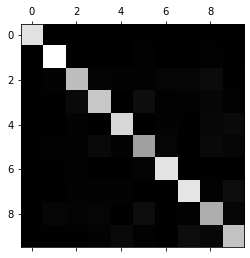

In [25]:
# 主對角線為分類正確的值
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

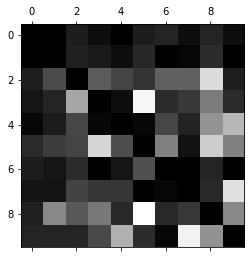

In [26]:
# 錯誤的分類
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [27]:
# Data Augmentation
from scipy.ndimage.interpolation import shift

def shift_image(digit_image, dx, dy):
    digit_image = digit_image.reshape((28, 28))
    shifted_image = shift(digit_image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [28]:
# Creating Augmented Dataset
x_train_augmented = [digit_image for digit_image in x_train]
y_train_augmented = [digit_image for digit_image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for digit_image, label in zip(x_train, y_train):
             x_train_augmented.append(shift_image(digit_image, dx, dy))
             y_train_augmented.append(label)

In [29]:
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(x_train_augmented))
x_train_augmented = np.array(x_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

In [30]:
# Training on augmented dataset
sgd_classifier_for_augmented = SGDClassifier(random_state=42, max_iter=1000)
sgd_classifier_for_augmented.fit(x_train_augmented,y_train_augmented)

SGDClassifier(random_state=42)

In [31]:
# Evaluating the model
from sklearn.metrics import accuracy_score
y_pred = sgd_classifier.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score before Data Augmentation:", score)

y_pred_after_augmented = sgd_classifier_for_augmented.predict(x_test)
score = accuracy_score(y_test, y_pred_after_augmented)
print("Accuracy score after Data Augmentation:", score)

Accuracy score before Data Augmentation: 0.858921875
Accuracy score after Data Augmentation: 0.81953125
